# MINERÍA DE TEXTOS

## Alumna: Jessica Sarahi Méndez Rincón


###  Proyecto Análisis de Sentimientos y Polaridad en Tweets
###  Tema: COVID-19

## Contexto:
    
    El año 2019 aparece una gripa de coronavirus con alto nivel de contagio, siendo declarado en el 2020 un estado de pandemia y afectando a varias naciones.
    
    México no ha sido exento del raro virus.
    
    Con el presente Proyecto, el objetivo primordial es desarrollar los algoritmos que ayuden a monitorizar el efecto en los comentarios que en la Red Social de Twitter se emiten, y que ayudé a dar una idea del estado de ánimo de la gente.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQUpnfdhCKN1C3OIbNrDdyjctlRsA9t6386WWD8JkUzt_X7JiuH&usqp=CAU" alt="Alt text that describes the graphic" title="Title text" />

In [7]:
# Importacion de librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
#Tienes que descargarte las stopwords primero via nltk.download()
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk import word_tokenize
from nltk.data import load
from nltk.stem import SnowballStemmer 
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from string import punctuation
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict 
from sklearn import model_selection, naive_bayes, svm




In [8]:
non_words = list(punctuation)
non_words.extend(['¿', '¡'])
non_words.extend(map(str,range(10)))


## Preparar los datos


In [11]:
# Importacion del archivo que se nos proporciono agregandole cabeceras que no contiene
names = ['Id', 'tweet', 'polaridad']
dataset = pd.read_csv('TweetsEtiquetadosPolaridad.txt', sep='\t',names=names)

In [12]:
dataset.head()

,Id,tweet,polaridad
0,819337926026862593,Antojo de empanada colombiana,NEU
1,817464156756574208,Me volvieron a dejar sola,N
2,819237267181080576,@ManuTonic Buenotes diotas. Un gran abrazo,P
3,817486639681466371,cual es su mejor recuerdo juntos? #BntResponde,NEU
4,819406610636357632,"@leonora_monge @susi_sot por mi sí, con 20 rojos",NEU


In [13]:
df=pd.DataFrame(dataset)


X = dataset.iloc[:, 1].values
Y = dataset.iloc[:, 2].values

dX=pd.DataFrame(X)  
dX.columns = ['tweet']
dX.head(5)




,tweet
0,Antojo de empanada colombiana
1,Me volvieron a dejar sola
2,@ManuTonic Buenotes diotas. Un gran abrazo
3,cual es su mejor recuerdo juntos? #BntResponde
4,"@leonora_monge @susi_sot por mi sí, con 20 rojos"


In [14]:

dY=pd.DataFrame(Y)  
dY.columns = ['polaridad']
dY.head(5)

,polaridad
0,NEU
1,N
2,P
3,NEU
4,NEU


In [15]:
dY['polaridad'].unique()

array(['NEU', 'N', 'P'], dtype=object)

## Tokenización, Normalización en minúsculas, StopWords, Stemming y Vectorización

In [16]:
df['tweet'] = [entry.lower() for entry in df['tweet']]

In [17]:

# Paso - 1c: Tokenización: en este cada entrada en el corpus se dividirá en un conjunto de palabras
df['tweet']= [word_tokenize(entry) for entry in df['tweet']]

# Paso - 1d: Eliminar palabras de detención, no numéricas y realizar el vástago / lemmenting de palabras.
# WordNetLemmatizer requiere etiquetas Pos para comprender si la palabra es sustantivo o verbo o adjetivo, etc. 
# De manera predeterminada, está configurada como Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(df['tweet']):
     # Declarar la lista vacía para almacenar las palabras que siguen las reglas de este paso
    Final_words = []
    # Inicializando WordNetLemmatizer ()
    word_Lemmatized = WordNetLemmatizer()
    # La función pos_tag a continuación proporcionará la 'etiqueta', es decir, si la palabra es Sustantivo (N) o Verbo (V) u otra cosa.
    for word, tag in pos_tag(entry):
        # La siguiente condición es verificar las palabras Stop y considerar solo alfabetos
        if word not in stopwords.words('spanish') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # El conjunto final procesado de palabras para cada iteración se almacenará en 'text_final'
    df.loc[index,'tweet_final'] = str(Final_words)
print(df.loc[index,'tweet_final'])

['compre', 'borinquen', 'internet', 'ver', 'si', 'aprende', 'poquito', 'dice', 'bobadas']


In [21]:
df.head(50)

,Id,tweet,polaridad,tweet_final
0,819337926026862593,"[antojo, de, empanada, colombiana]",NEU,"['antojo', 'empanada', 'colombiana']"
1,817464156756574208,"[me, volvieron, a, dejar, sola]",N,"['volvieron', 'dejar', 'sola']"
2,819237267181080576,"[@, manutonic, buenotes, diotas, ., un, gran, ...",P,"['manutonic', 'buenotes', 'diotas', 'gran', 'a..."
3,817486639681466371,"[cual, es, su, mejor, recuerdo, juntos, ?, #, ...",NEU,"['mejor', 'recuerdo', 'junto', 'bntresponde']"
4,819406610636357632,"[@, leonora_monge, @, susi_sot, por, mi, sí, ,...",NEU,['rojos']
5,819228623215489024,"[@, racesgar, que, linda, la, gente, educada, ...",P,"['racesgar', 'linda', 'gente', 'educada', 'gra..."
6,819401045143093249,"[que, lindo, estar, metida, en, la, casa, todo...",N,"['lindo', 'metida', 'casa', 'día']"
7,818852374261465088,"[@, noefernandez02, hey, sii, sí, queres, me, ...",P,"['hey', 'sii', 'queres', 'pasas', 'datos', 'dm']"
8,819155840997490688,"[@, issmaelsandoval, que, bonita, la, gente, e...",P,"['issmaelsandoval', 'bonita', 'gente', 'educad..."
9,819220479626059776,"[#, felizmiercoles, porque, hoy, pase, lo, que...",P,"['felizmiercoles', 'hoy', 'pase', 'pase', 'va'..."


## Datos de Entrenamiento y Pruebas

In [22]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['tweet_final'],df['polaridad'],test_size=0.3)

In [23]:
Train_Y.head(5)

3034    P
1162    N
2538    N
6985    N
2568    P
Name: polaridad, dtype: object

In [24]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [25]:
print(Train_Y)

[2 0 0 ... 0 0 0]


In [26]:
df.head()

,Id,tweet,polaridad,tweet_final
0,819337926026862593,"[antojo, de, empanada, colombiana]",NEU,"['antojo', 'empanada', 'colombiana']"
1,817464156756574208,"[me, volvieron, a, dejar, sola]",N,"['volvieron', 'dejar', 'sola']"
2,819237267181080576,"[@, manutonic, buenotes, diotas, ., un, gran, ...",P,"['manutonic', 'buenotes', 'diotas', 'gran', 'a..."
3,817486639681466371,"[cual, es, su, mejor, recuerdo, juntos, ?, #, ...",NEU,"['mejor', 'recuerdo', 'junto', 'bntresponde']"
4,819406610636357632,"[@, leonora_monge, @, susi_sot, por, mi, sí, ,...",NEU,['rojos']


In [27]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df['tweet_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

## Identificación de Polaridad con  Algoritmos de Aprendizaje Supervisado

In [30]:
# Clasificador - Algoritmo - Naive Bayes
# Se ajusta el conjunto de datos de entrenamiento en el clasificador
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# Predecir las etiquetas en el conjunto de datos de validación
predictions_NB = Naive.predict(Test_X_Tfidf)
# Usando la función de precision_score para obtener la precisión
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  51.74793008279669


In [31]:
# Clasificador - Algoritmo - SVM
# Se ajusta el conjunto de datos de entrenamiento en el clasificador
SVM = svm.SVC(C=1.20, kernel='linear', degree=3, gamma='auto',   max_iter=1000,  tol=0.0001)
SVM.fit(Train_X_Tfidf,Train_Y)
# predecir las etiquetas en el conjunto de datos de validación
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Usando la función precision_score para obtener la precisión
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)
 

C:\Users\Jess\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVM Accuracy Score ->  51.74793008279669


In [32]:
print(SVM)

SVC(C=1.2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=1000, probability=False, random_state=None, shrinking=True,
  tol=0.0001, verbose=False)


In [33]:
# Prediccion del conjunto de prueba de acuerdo al 30% para los entrenamientos 120 registros
y_pred = SVM.predict(Test_X_Tfidf)

In [34]:
print(Test_Y)

[2 0 1 ... 0 1 0]


In [35]:
print(y_pred)

[0 0 1 ... 2 2 0]


In [36]:
# Matriz de confusion
cm = confusion_matrix(Test_Y, y_pred, labels=[0, 1, 2])
cm 

array([[515, 235, 100],
       [251, 291, 156],
       [144, 163, 319]], dtype=int64)

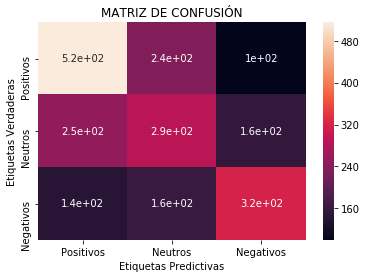

In [37]:

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# Etiquetas, Título and medidas
ax.set_xlabel('Etiquetas Predictivas');ax.set_ylabel('Etiquetas Verdaderas'); 
ax.set_title('MATRIZ DE CONFUSIÓN'); 
ax.xaxis.set_ticklabels(['Positivos', 'Neutros','Negativos']); ax.yaxis.set_ticklabels(['Positivos', 'Neutros','Negativos']);

In [41]:
names = ['Id', 'tweet', 'polaridad']
df_prediccion = pd.read_csv('TweetsEtiquetadosPolaridad.txt', sep='\t',names=names)
df_emolex = pd.read_csv('TweetsEtiquetadosPolaridad.txt', sep='\t',names=names)

In [42]:
df_prediccion.head(5)


,Id,tweet,polaridad
0,819337926026862593,Antojo de empanada colombiana,NEU
1,817464156756574208,Me volvieron a dejar sola,N
2,819237267181080576,@ManuTonic Buenotes diotas. Un gran abrazo,P
3,817486639681466371,cual es su mejor recuerdo juntos? #BntResponde,NEU
4,819406610636357632,"@leonora_monge @susi_sot por mi sí, con 20 rojos",NEU


In [43]:
df_prediccion['tweet'] = [entry.lower() for entry in df_prediccion['tweet']]
# Paso - 1c: Tokenización: en este cada entrada en el corpus se dividirá en un conjunto de palabras
df_prediccion['tweet']= [word_tokenize(entry) for entry in df_prediccion['tweet']]

# Paso - 1d: Eliminar palabras de detención, no numéricas y realizar el vástago / lemmenting de palabras.
# WordNetLemmatizer requiere etiquetas Pos para comprender si la palabra es sustantivo o verbo o adjetivo, etc. 
# De manera predeterminada, está configurada como Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(df_prediccion['tweet']):
     # Declarar la lista vacía para almacenar las palabras que siguen las reglas de este paso
    Final_words = []
    # Inicializando WordNetLemmatizer ()
    word_Lemmatized = WordNetLemmatizer()
    # La función pos_tag a continuación proporcionará la 'etiqueta', es decir, si la palabra es Sustantivo (N) o Verbo (V) u otra cosa.
    for word, tag in pos_tag(entry):
        # La siguiente condición es verificar las palabras Stop y considerar solo alfabetos
        if word not in stopwords.words('spanish') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # El conjunto final procesado de palabras para cada iteración se almacenará en 'text_final'
    df_prediccion.loc[index,'tweet_final'] = str(Final_words)
print(df_prediccion.loc[index,'tweet_final'])

['compre', 'borinquen', 'internet', 'ver', 'si', 'aprende', 'poquito', 'dice', 'bobadas']


In [44]:
df_prediccion.head(5)

,Id,tweet,polaridad,tweet_final
0,819337926026862593,"[antojo, de, empanada, colombiana]",NEU,"['antojo', 'empanada', 'colombiana']"
1,817464156756574208,"[me, volvieron, a, dejar, sola]",N,"['volvieron', 'dejar', 'sola']"
2,819237267181080576,"[@, manutonic, buenotes, diotas, ., un, gran, ...",P,"['manutonic', 'buenotes', 'diotas', 'gran', 'a..."
3,817486639681466371,"[cual, es, su, mejor, recuerdo, juntos, ?, #, ...",NEU,"['mejor', 'recuerdo', 'junto', 'bntresponde']"
4,819406610636357632,"[@, leonora_monge, @, susi_sot, por, mi, sí, ,...",NEU,['rojos']


In [65]:
 #print(list(nltk.ngrams(nltk_tokens,3)))

In [45]:
df_prediccion['polaridad_P']=  SVM.predict(Tfidf_vect.transform(df_prediccion['tweet_final']))

In [72]:
#df_prediccion.head(550)

In [46]:
dt_examen=df_prediccion 

In [47]:
dt_examen.tweet_final

0                    ['antojo', 'empanada', 'colombiana']
1                          ['volvieron', 'dejar', 'sola']
2       ['manutonic', 'buenotes', 'diotas', 'gran', 'a...
3           ['mejor', 'recuerdo', 'junto', 'bntresponde']
4                                               ['rojos']
5       ['racesgar', 'linda', 'gente', 'educada', 'gra...
6                      ['lindo', 'metida', 'casa', 'día']
7        ['hey', 'sii', 'queres', 'pasas', 'datos', 'dm']
8       ['issmaelsandoval', 'bonita', 'gente', 'educad...
9       ['felizmiercoles', 'hoy', 'pase', 'pase', 'va'...
10      ['alakaskala', 'hoy', 'lista', 'buenos', 'días...
11      ['mendezcr', 'q', 'puede', 'hacer', 'darse', '...
12      ['bueno', 'frío', 'puedo', 'comer', 'siempre',...
13      ['lonchs', 'caso', 'bien', 'derecho', 'equivoc...
14      ['sharhell', 'solo', 'cuestión', 'ponerle', 'b...
15      ['massimo', 'bottura', 'américa', 'méxico', 'a...
16      ['vernonist', 'serio', 'aprendo', 'gracias', '...
17      ['amar

In [48]:
df_emolex.head()

,Id,tweet,polaridad
0,819337926026862593,Antojo de empanada colombiana,NEU
1,817464156756574208,Me volvieron a dejar sola,N
2,819237267181080576,@ManuTonic Buenotes diotas. Un gran abrazo,P
3,817486639681466371,cual es su mejor recuerdo juntos? #BntResponde,NEU
4,819406610636357632,"@leonora_monge @susi_sot por mi sí, con 20 rojos",NEU


# Aqui

In [49]:
from py_lex import EmoLex
non_words = list(punctuation)
non_words.extend(['¿', '¡'])
non_words.extend(map(str,range(10)))
lemmatizer = WordNetLemmatizer() 
lexicon = EmoLex('lexicon_spanish.txt')

In [50]:
# Importacion del archivo que se nos proporciono agregandole cabeceras que no contiene
names = ['Id', 'tweet', 'polaridad']
df_emolex_O = pd.read_csv('TweetsEtiquetadosPolaridad.txt', sep='\t',names=names)
df_emolex_O.head(21)

,Id,tweet,polaridad
0,819337926026862593,Antojo de empanada colombiana,NEU
1,817464156756574208,Me volvieron a dejar sola,N
2,819237267181080576,@ManuTonic Buenotes diotas. Un gran abrazo,P
3,817486639681466371,cual es su mejor recuerdo juntos? #BntResponde,NEU
4,819406610636357632,"@leonora_monge @susi_sot por mi sí, con 20 rojos",NEU
5,819228623215489024,@racesgar Que linda la gente educada un gran a...,P
6,819401045143093249,que lindo estar metida en la casa todo el día,N
7,818852374261465088,@noefernandez02 hey sii sí queres me pasas tus...,P
8,819155840997490688,@IssmaelSandoval Que bonita la gente educada u...,P
9,819220479626059776,#FelizMiercoles porque hoy pase lo que pase va...,P


In [51]:
df_emolex=df_emolex_O.drop(columns=['Id'])   
  
#df_emolex[tweet]=df_emolex.drop(columns=['tweet'])
df_emolex['etiquetaoriginal'] =df_emolex['polaridad'] 
df_emolex=df_emolex.drop(columns=['polaridad'])
df_emolex['Tweet'] =df_emolex['tweet'] 
df_emolex=df_emolex.drop(columns=['tweet'])
df_emolex['tweet'] =df_emolex['Tweet'] 
df_emolex=df_emolex.drop(columns=['Tweet'])
#df_emolex.rename(columns={"Tweet": "tweet"})
df_emolex.head() 

,etiquetaoriginal,tweet
0,NEU,Antojo de empanada colombiana
1,N,Me volvieron a dejar sola
2,P,@ManuTonic Buenotes diotas. Un gran abrazo
3,NEU,cual es su mejor recuerdo juntos? #BntResponde
4,NEU,"@leonora_monge @susi_sot por mi sí, con 20 rojos"


In [52]:
df_emolex['tweetF']=[lemmatizer.lemmatize(w,'v') for w in df_emolex.tweet] 
df_emolex['tweetF'] = df_emolex.tweetF.str.strip().str.split('[\W_]+')
df_emolex.head()

,etiquetaoriginal,tweet,tweetF
0,NEU,Antojo de empanada colombiana,"[Antojo, de, empanada, colombiana]"
1,N,Me volvieron a dejar sola,"[Me, volvieron, a, dejar, sola]"
2,P,@ManuTonic Buenotes diotas. Un gran abrazo,"[, ManuTonic, Buenotes, diotas, Un, gran, abrazo]"
3,NEU,cual es su mejor recuerdo juntos? #BntResponde,"[cual, es, su, mejor, recuerdo, juntos, BntRes..."
4,NEU,"@leonora_monge @susi_sot por mi sí, con 20 rojos","[, leonora, monge, susi, sot, por, mi, sí, con..."


In [53]:
rows = list()

for row in df_emolex[['tweetF']].iterrows():
    r = row[1]
for word in r.tweetF:
    rows.append((word))

tweet9 = pd.DataFrame(rows, columns=['tweet'])


In [54]:
tweet9.head()

,tweet
0,
1,abbu25
2,compre
3,Hasta
4,Borinquen


In [55]:
summary = lexicon.summarize_doc(tweet9)
summary

{'sadness': 0.0,
 'joy': 0.0,
 'trust': 0.0,
 'disgust': 0.0,
 'positive': 0.0,
 'anger': 0.0,
 'negative': 0.0,
 'fear': 0.0,
 'anticipation': 0.0,
 'amor': 0.0,
 'surprise': 0.0}

In [56]:
df_emolex.head()

,etiquetaoriginal,tweet,tweetF
0,NEU,Antojo de empanada colombiana,"[Antojo, de, empanada, colombiana]"
1,N,Me volvieron a dejar sola,"[Me, volvieron, a, dejar, sola]"
2,P,@ManuTonic Buenotes diotas. Un gran abrazo,"[, ManuTonic, Buenotes, diotas, Un, gran, abrazo]"
3,NEU,cual es su mejor recuerdo juntos? #BntResponde,"[cual, es, su, mejor, recuerdo, juntos, BntRes..."
4,NEU,"@leonora_monge @susi_sot por mi sí, con 20 rojos","[, leonora, monge, susi, sot, por, mi, sí, con..."


In [57]:
df_emolex['anger'] = 0.0
df_emolex['anticipation'] = 0.0
df_emolex['disgust'] = 0.0
df_emolex['fear'] = 0.0
df_emolex['joy'] = 0.0
df_emolex['negative'] = 0.0
df_emolex['positive'] = 0.0
df_emolex['sadness'] = 0.0
df_emolex['surprise'] = 0.0
df_emolex['trust'] = 0.0 



for index, _ in df_emolex.iterrows():
    try:
        to_lower = list(map(lambda x:x.lower(),df_emolex.loc[index].tweetF))
        summary = lexicon.summarize_doc(to_lower)
        for key in summary.keys():
            df_emolex.at[index, key] = summary[key]
            #print(dataset2.at[index, key] )
    except:
        continue
df_emolex.head()

,etiquetaoriginal,tweet,tweetF,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,amor
0,NEU,Antojo de empanada colombiana,"[Antojo, de, empanada, colombiana]",0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
1,N,Me volvieron a dejar sola,"[Me, volvieron, a, dejar, sola]",0.0,0.0,0.0,0.0,0.000000,0.2,0.000000,0.2,0.2,0.000000,0.0
2,P,@ManuTonic Buenotes diotas. Un gran abrazo,"[, ManuTonic, Buenotes, diotas, Un, gran, abrazo]",0.0,0.0,0.0,0.0,0.166667,0.0,0.166667,0.0,0.0,0.166667,0.0
3,NEU,cual es su mejor recuerdo juntos? #BntResponde,"[cual, es, su, mejor, recuerdo, juntos, BntRes...",0.0,0.0,0.0,0.0,0.000000,0.0,0.142857,0.0,0.0,0.000000,0.0
4,NEU,"@leonora_monge @susi_sot por mi sí, con 20 rojos","[, leonora, monge, susi, sot, por, mi, sí, con...",0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0


In [58]:

df_emolex['TweetNeutro'] = np.where((df_emolex['positive'] == df_emolex['negative']),  1.0,0)
df_emolex['TweetPositivo'] = np.where((df_emolex['positive'] > df_emolex['negative']),  1.0,0)
df_emolex['TweetNegativo'] = np.where((df_emolex['negative'] > df_emolex['positive']), 1.0,0)
df_emolex.head(22)

,etiquetaoriginal,tweet,tweetF,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,amor,TweetNeutro,TweetPositivo,TweetNegativo
0,NEU,Antojo de empanada colombiana,"[Antojo, de, empanada, colombiana]",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0,1.0,0.0,0.0
1,N,Me volvieron a dejar sola,"[Me, volvieron, a, dejar, sola]",0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.200000,0.2000,0.000000,0.0,0.0,0.0,1.0
2,P,@ManuTonic Buenotes diotas. Un gran abrazo,"[, ManuTonic, Buenotes, diotas, Un, gran, abrazo]",0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.166667,0.000000,0.0000,0.166667,0.0,0.0,1.0,0.0
3,NEU,cual es su mejor recuerdo juntos? #BntResponde,"[cual, es, su, mejor, recuerdo, juntos, BntRes...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.0000,0.000000,0.0,0.0,1.0,0.0
4,NEU,"@leonora_monge @susi_sot por mi sí, con 20 rojos","[, leonora, monge, susi, sot, por, mi, sí, con...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0,1.0,0.0,0.0
5,P,@racesgar Que linda la gente educada un gran a...,"[, racesgar, Que, linda, la, gente, educada, u...",0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.0000,0.111111,0.0,0.0,1.0,0.0
6,N,que lindo estar metida en la casa todo el día,"[que, lindo, estar, metida, en, la, casa, todo...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.0000,0.000000,0.0,0.0,1.0,0.0
7,P,@noefernandez02 hey sii sí queres me pasas tus...,"[, noefernandez02, hey, sii, sí, queres, me, p...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0,1.0,0.0,0.0
8,P,@IssmaelSandoval Que bonita la gente educada u...,"[, IssmaelSandoval, Que, bonita, la, gente, ed...",0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.090909,0.000000,0.0000,0.090909,0.0,0.0,1.0,0.0
9,P,#FelizMiercoles porque hoy pase lo que pase va...,"[, FelizMiercoles, porque, hoy, pase, lo, que,...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0,1.0,0.0,0.0


In [59]:


df_array =  np.array(df_emolex) 
row, col = df_array.shape 
lista=['enojo','anticipacion','disgusto','miedo','alegria','negativo','positivo', 'tristeza','sorpresa','confianza',
       'Tweets_Neutro','Tweets_Positivo','Tweets_Negativo','TweetAlegria','TweetConfianza','TweetSorpresa','TweetAnticipacion',
      'TweetDisgusto','TweetEnojo','TweetMiedo','TweetTristeza'] 
lista_Polaridad=['neutro','positivo','negativo' ] 
listasuma = []
listasumaTweetsPolaridad = []

sumaTotal1=0
sumaTotal2=0
sumaTotalTweets=0
for x in range(3,13): 
    sumaColumnas=0 
    for y in range(0,row):
        sumaColumnas=sumaColumnas +df_array[y][x]
    print("La suma de la columna "+str(x-1)  + " es "+ lista[x-2]+" "+  str(sumaColumnas))
    listasuma.insert(x, round(sumaColumnas,2))
    if x==8 or x==9 :
        sumaTotal2=sumaTotal2+sumaColumnas
    else:
        sumaTotal1=sumaTotal1+sumaColumnas 
#print("aqui")

La suma de la columna 2 es anticipacion 90.25278100822185
La suma de la columna 3 es disgusto 162.42711160127837
La suma de la columna 4 es miedo 93.80061554524272
La suma de la columna 5 es alegria 121.9086851902791
La suma de la columna 6 es negativo 159.92698242255156
La suma de la columna 7 es positivo 218.90491961468356
La suma de la columna 8 es tristeza 288.0009471779612
La suma de la columna 9 es sorpresa 162.2847202261888
La suma de la columna 10 es confianza 79.33912795452741
La suma de la columna 11 es Tweets_Neutro 183.35300504199154


In [60]:
df_emolex

,etiquetaoriginal,tweet,tweetF,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,amor,TweetNeutro,TweetPositivo,TweetNegativo
0,NEU,Antojo de empanada colombiana,"[Antojo, de, empanada, colombiana]",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0
1,N,Me volvieron a dejar sola,"[Me, volvieron, a, dejar, sola]",0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.200000,0.200000,0.000000,0.0,0.0,0.0,1.0
2,P,@ManuTonic Buenotes diotas. Un gran abrazo,"[, ManuTonic, Buenotes, diotas, Un, gran, abrazo]",0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.166667,0.000000,0.000000,0.166667,0.0,0.0,1.0,0.0
3,NEU,cual es su mejor recuerdo juntos? #BntResponde,"[cual, es, su, mejor, recuerdo, juntos, BntRes...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0
4,NEU,"@leonora_monge @susi_sot por mi sí, con 20 rojos","[, leonora, monge, susi, sot, por, mi, sí, con...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0
5,P,@racesgar Que linda la gente educada un gran a...,"[, racesgar, Que, linda, la, gente, educada, u...",0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000,0.111111,0.0,0.0,1.0,0.0
6,N,que lindo estar metida en la casa todo el día,"[que, lindo, estar, metida, en, la, casa, todo...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0
7,P,@noefernandez02 hey sii sí queres me pasas tus...,"[, noefernandez02, hey, sii, sí, queres, me, p...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0
8,P,@IssmaelSandoval Que bonita la gente educada u...,"[, IssmaelSandoval, Que, bonita, la, gente, ed...",0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.090909,0.000000,0.000000,0.090909,0.0,0.0,1.0,0.0
9,P,#FelizMiercoles porque hoy pase lo que pase va...,"[, FelizMiercoles, porque, hoy, pase, lo, que,...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0


In [62]:
df_emolex.to_csv('ArchivoPolaridad.csv')